Do not modify the code below

In [1]:
!git clone https://github.com/scikit-maad/scikit-maad.git
!pip install librosa==0.8.1
!pip install scikit-maad

Cloning into 'scikit-maad'...
remote: Enumerating objects: 10604, done.
remote: Counting objects: 100% (1337/1337), done.
remote: Compressing objects: 100% (537/537), done.
remote: Total 10604 (delta 802), reused 1209 (delta 752), pack-reused 9267
Receiving objects: 100% (10604/10604), 183.25 MiB | 28.25 MiB/s, done.
Resolving deltas: 100% (7747/7747), done.
Updating files: 100% (267/267), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.8/203.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.8 MB/s eta 0:00:00
  Attempting uninstall: librosa
    Found existing installation: librosa 0.10.1
    Uninstalling librosa-0.10.1:
      Successfully uninstalled librosa-0.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.5/152.5 kB 1.8 MB/s eta 0:00:00


Do not modify the code below

In [2]:
from google.colab import drive
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile

# Google Authentication
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download files
downloaded = drive.CreateFile({'id':"14DhekSGDAGFBr2QmVPhPjlgsrafGT0Ii"})
downloaded.GetContentFile('ISEC2022_EDufourq.zip')

# Extract files to temporary location in Google Drive
with zipfile.ZipFile('ISEC2022_EDufourq.zip', 'r') as zip_file:
    zip_file.extractall()

downloaded = drive.CreateFile({'id':"1dsrlhqzRTl9pEEtA3cAVboVqRJR0scFy"})
downloaded.GetContentFile('test_audio.WAV')

downloaded = drive.CreateFile({'id':"1KutkQTbhHl680xIIw94w38t_GIvqKQQm"})
downloaded.GetContentFile('annotations.csv')

Do not modify the code below

In [3]:
# Audio things
# ------------
import librosa
import librosa.display
from IPython.display import Image

# Neural network things
# ---------------------
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPool2D, Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import tensorflow.keras as keras

# Other things
# -------------
from scipy import signal
import numpy as np
import scipy
import matplotlib.pyplot as plt
!pip install SoundFile
from IPython.display import Audio
import pandas as pd
import math
import random
import pandas as pd
from itertools import count
import maad
from maad import sound, util
from maad.rois import template_matching

### Task 0

* Download the file `test_audio.WAV` to your computer, from the website.

* Open it in SonicVisualiser.

* Immediately at the start of the file, you will notice a vocalisation for the first 6 seconds of this file. This is a Pin-tailed whydah. You'll notice verticle lines.

* Zoom in, using the frequency and time axis wheel, so that you can see these lines really clearly.

* Rapidly and briefly scan the file for more vocalisations of this bird, they will appear the same, i.e., mostly as types of verticle lines.

* Now go to second 170 (or after) in the file. From here, try and find two more examples of this vocalisation for which the two examples are at least 200 seconds minutes apart. Take two screenshots, and save these images.

* You will email these two images to the tutor as a single email, with this subject line: "DL4E2024T1 - YOUR NAME"

### Task 1

Read in the audio file called `test_audio.WAV'. You can use the sci-kit maad approach

In [4]:
audio,sr=librosa.load('test_audio.WAV',sr=48000)# TO DO

### Task 2
Determine the number of samples in the audio file.

In [5]:
num_samples=len(audio)
num_samples# TO DO

57600000

### Task 3
Determine the sampling rate of the audio file

In [6]:
import torch
import torchaudio
info=torchaudio.info('test_audio.WAV')# TO DO
print(info) # sample rate=48000)

AudioMetaData(sample_rate=48000, num_frames=57600000, num_channels=1, bits_per_sample=16, encoding=PCM_S)


### Task 4
Determine, using code, the duration of the audio file

In [7]:
# TO DO
duration=len(audio)/sr
duration

1200.0

### Task 5
Plot a waveform of the entire audio file.

The x-axis should be labeled as "time" and the y-axis as "amplitude".

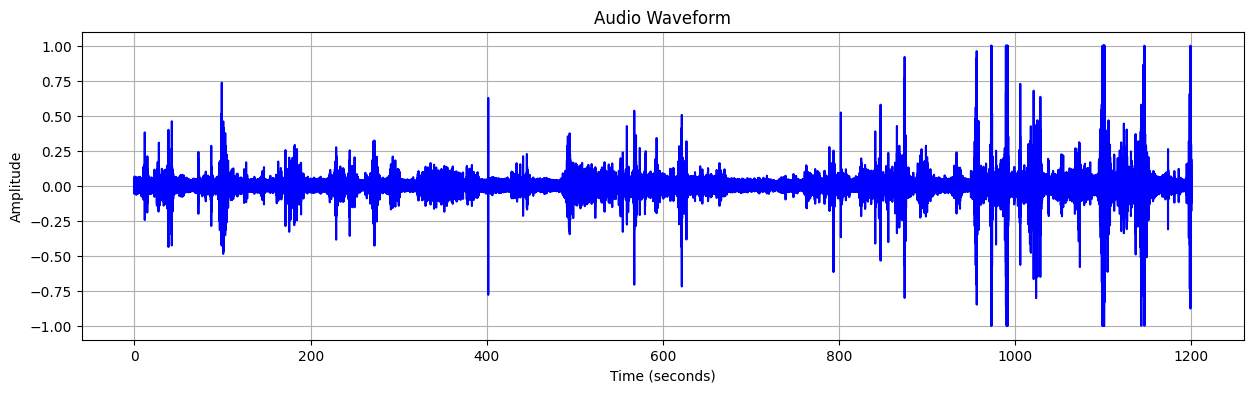

In [8]:
# TO DO
time_axis = np.arange(0, len(audio)) /sr # Assuming 'sample_rate' is known

# Plot the waveform
plt.figure(figsize=(15, 4))
plt.plot(time_axis, audio, color='b')
plt.title('Audio Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


### Task 6
Plot a waveform, but only plot between seconds 882 and 883.


The x-axis should be labeled as "time" and the y-axis as "amplitude".

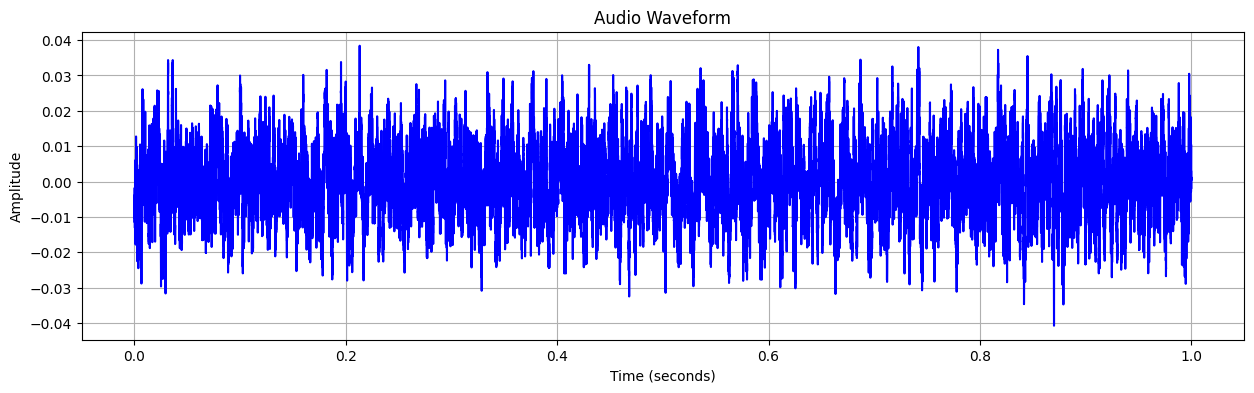

In [9]:
# TO DO
time_axis = np.arange(0, len(audio[882*sr:883*sr])) /sr # Assuming 'sample_rate' is known

# Plot the waveform
plt.figure(figsize=(15, 4))
plt.plot(time_axis,audio[882*sr:883*sr], color='b')
plt.title('Audio Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()



### Task 7
Plot a waveform, but only plot between seconds 100.4 and 103.2.


The x-axis should be labeled as "time" and the y-axis as "amplitude".

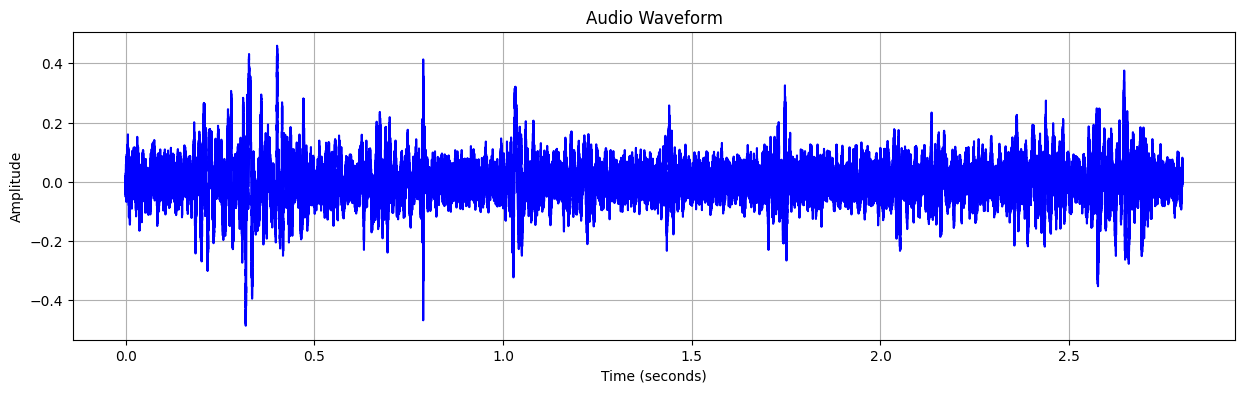

In [10]:
# TO DO
time_axis = np.arange(0, len(audio[int(100.4*sr):int(103.2*sr)])) /sr # Assuming 'sample_rate' is known

# Plot the waveform
plt.figure(figsize=(15, 4))
plt.plot(time_axis,audio[int(100.4*sr):int(103.2*sr)], color='b')
plt.title('Audio Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()



### Task 8
You will use scikit-maad to plot a mel spectrogram. Before you do that, you need to prepare all of the hyper-parameters, which is what you will do in the cell below.

* Set the lower and upper time limits to 290 and 293 respectively.

* Set the lower and upper frequency limits to 3,000 and 9,000 Hz respectively.

* Use a hann window function, and a db range of 80.

* You should decide on the window size and hop size. In task 9, you will view the spectrogram. You may adjust these two hyper-parameters (window and hop size) after you view the spectrogram.

In [11]:
# TO DO
tlims=(290,293)
flims=(3000,9000)
nperseg = 1024 # window length
noverlap = 64 # hop size
window = 'hann' #window function
db_range = 80

### Task 9
Given the hyper-parameters you selected above from task 8, use sci-kit maad to create a mel-spectrogram and visualise the spectrogram.

* If you can see a eight (8) distinct vocalisations, then you can move to the next cell.

* If you cannot see the eight vocalisations, then you should go to the previous cells and adjust your hyper-parameters.

* Hint: you can use `librosa.display.specshow()` and `util.power2dB()`

* Hint: you should use the lower/upper bounds, and other hyper-parameters, that were specified in task 8.

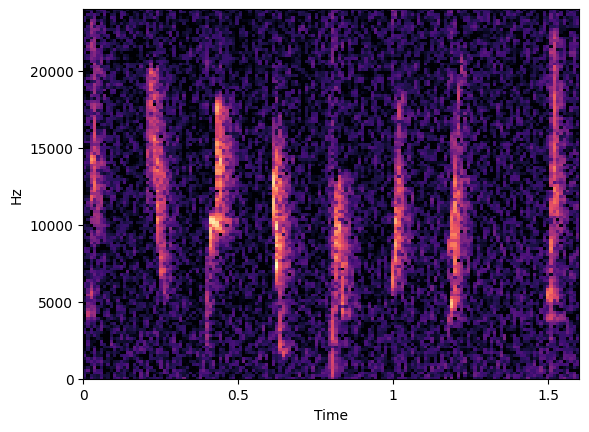

In [12]:
# TO DO: Create spectrogram
S, _, _, _ = sound.spectrogram(audio, sr, window, nperseg, noverlap, flims, tlims)
S_db= util.power2dB(S, db_range)

# TO DO: view the spectrogram
librosa.display.specshow(S_db, y_axis='linear', x_axis='time', sr=sr)

### Task 10
Determine the shape of the spectrogram

In [13]:
# TO DO
S_db.shape

(129, 150)

### Task 11
Write down the number of time bins that are in the spectrogram. Do this in the empty cell below.

In [14]:
# TO DO
num_time_bins=150

Read in a csv file which contains the start times of presence and absence events.

* You do not need to do anything here, except view the dataframe below.

* The .csv file has two columns `start` which contains the start time, and `target` which contains the label 1 or 0.

* Assume that the duration for each event is 3 seconds. For example, if the start time is 3, and the label is 1, then between seconds 3 and 6 there was a presence event.



In [15]:
df = pd.read_csv('annotations.csv')

In [16]:
df

,start,target
0,17,1
1,18,1
2,19,1
3,20,1
4,21,1
...,...,...
129,1192,0
130,1193,0
131,264,0
132,265,0


* You do not need to do anything.

* The code below extracts audio segments from the original audio file which we loaded earlier in this notebook.

* It iterates over the Pandas dataframe, and obtains the start time and label.

* Using the start time, it will extract the corresponding audio segment given the assumed duration of 3 seconds.

* It will produce two outputs, `X` and `Y`.

* `X` will contain the mel spectrograms

* `Y` will contain the targets (0 or 1).

**NOTE:** The cell below will take approximately 4 minutes to complete!

In [17]:
X = []
Y = []

# Assumption!
duration = 3

for item,row in df.iterrows():
    print(row['start'])

    # Get the start time for this "row"
    start_seconds = row['start']

    tlims = (start_seconds, start_seconds+duration)
    S, _, _, _ = sound.spectrogram(audio, sr, window, nperseg,
                                          noverlap, flims, tlims)
    S = util.power2dB(S, db_range)

    # Accumulate these spectrograms in variable X
    X.append(S)

    # If this "row" is a presence event, then set the taget to "1"
    if row['target'] == 1:
        Y.append('1')

    # Otherwise, this "row" is an absence event, then set the taget to "1"
    else:

        Y.append('0')

X = np.asarray(X)
Y = np.asarray(Y)

17
18
19
20
21
22
23
24
25
33
37
188
189
190
289
290
291
292
293
294
295
296
320
326
327
337
338
343
345
354
356
357
363
388
492
501
505
509
510
511
512
513
514
515
516
532
533
534
593
735
747
821
822
823
824
834
835
873
896
902
935
936
1029
1044
1045
1082
80
81
82
83
84
99
100
101
124
125
126
127
270
271
272
273
475
476
477
616
617
787
788
789
790
791
792
1008
1009
1010
1011
1012
1013
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1190
1191
1192
1193
264
265
266


The next cell deletes the original audio file. You do not need to do anything.

In [18]:
del audio

### Task 12
Print the shape of the features and targets that you just created. Remember, they were stored in two variables. The previous cells gives you some hints about this.

In my case it was:
```
(134, 129, 150)
(134,)
```

In [19]:
# TO DO
print(X.shape)
print(Y.shape)

(134, 129, 150)
(134,)


### Task 13

* Given the features and targets that you just created, display two spectrograms and print out the corresponding target.

* You can randomly select any two examples. But one should contain a presence event, and the other should not.

* The vocalisations of this bird appear as consecutive vertical lines

* Hint: you can use `librosa.display.specshow()`

* Hint: if you are seeing blank spectrograms, it probably means you are using the `power_to_db()` function. Do not use this.

1


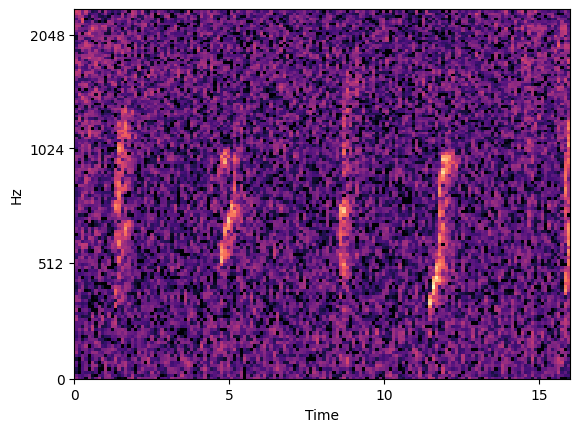

In [20]:
# TO DO
import random
# random presence spectrogram
i=random.randint(0,len(X[Y=='1']))
#random select using mask indexing
librosa.display.specshow(X[Y=='1'][i],sr=4800, x_axis='time',y_axis='mel')
# corresponding target
print(Y[Y=='1'][i])

0


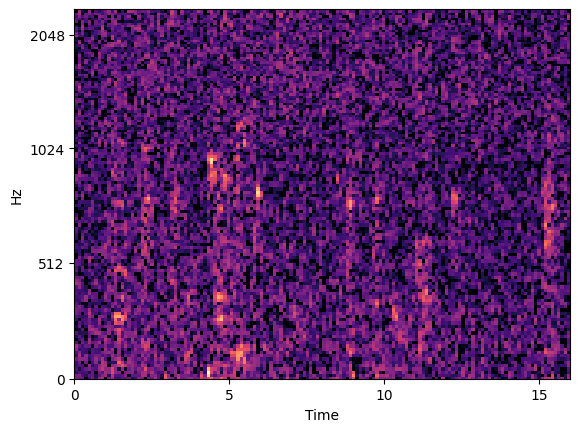

In [21]:
# TO DO
# random absence spectrogram
i=random.randint(0,len(X[Y=='0']))
#random select using mask indexing
librosa.display.specshow(X[Y=='0'][i],sr=4800, x_axis='time',y_axis='mel')
# corresponding target
print(Y[Y=='0'][i])

### Task 14

* The code below will attempt to augment the dataset.

* It will iterate over each example in the dataset.

* For each example, it will randomly shift the spectrogram.

* You need to add some code, where it states `TO DO`, that will:
 * Draw a random real number between 0 and 1.
 * If the number if greater than 0.5, then you should create some random noise. The shape of this random noise should not be a vector, but instead, it should have the same shape of the spectrograms.
 * You now need to add your random noise matrix to the spectrogram  

In [22]:
import random

def augment(number, X, Y):

    augmented_X = []
    augmented_Y = []

    # Repeat a bunch of times.
    for i in range (0, number):

        # Iterate over all the data we have (spectrogram and targets)
        for index, spectrogram, target in zip(count(), X, Y):

            # Randomly decide how much to shift by
            shift = random.randint(0,len(spectrogram))

            # Perform the shift
            spec_shifted = np.roll(spectrogram, shift)

            # Add some Gaussian noise but only do so with
            # with some probability. If the probability is
            # greater than some threshold, say 0.5, then you
            # should add some random noise to your spectrogram
            # otherwise, don't add noise to your spectrogram
            # Hint: You can make use of the math.random class
            # to get a random number between 0 and 1.
            # Hint: You can use this function to add random noise
            # in the shape of the spectrogram
            # https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

            # TO DO random real number.
            # Hint, you can use random.uniform()
            prob = random.uniform(0,1) # TO DO

            if prob > 0.5:

              noise_stddev = 0.02
              # TO DO create random noise with the size being the same
              # as the spectrogram. Hint you can use np.random.normal()
              # Hint: you can specify the size of the noisy matrix
              noise =noise_stddev*np.random.normal(size=(129,150)) # TO DO

              # TO DO Add noise to the shifted spectrogram (spec_shifted)
              noisy_audio = spec_shifted + noise # TO DO

              augmented_X.append(noisy_audio)

            else:
              # Add the newly created spectrogram to our new variable
              augmented_X.append(spec_shifted)

            # The target won't change, so a presence is still a presence,
            # and an absence is still an absence
            augmented_Y.append(target)

    del X,Y
    augmented_X = np.asarray(augmented_X)
    augmented_Y = np.asarray(augmented_Y)

    return augmented_X, augmented_Y

This will now execute the augmentation. You do not need to change anything here

In [23]:
augmented_X, augmented_Y = augment(50, X, Y)

### Task 15
Determine the new shape of your features and targets after augmentation.

In my case, the output of this was

```
(6700, 129, 150)
(6700,)
```

In [24]:
# TO DO
print(augmented_X.shape)
print(augmented_Y.shape )

(6700, 129, 150)
(6700,)


### Task 16
Display two spectrograms from your newly created augmented features and targets.

* One should contain a vocalisation, and the other should not.

* You can randomly pick if you want, or use another strategy to select which ones to display.

* Hint, you can use `librosa.display.specshow()`.

1


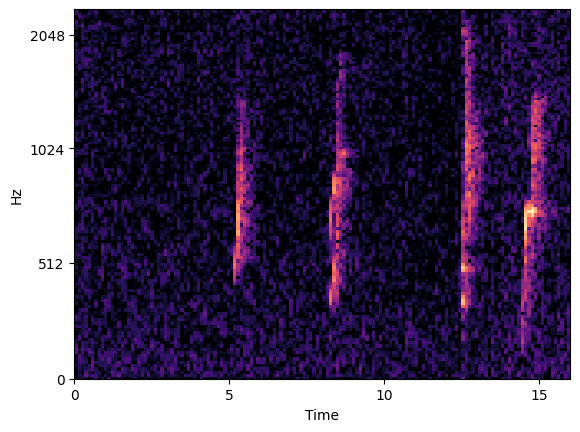

In [25]:
# TO DO
i=random.randint(0,len(augmented_X[augmented_Y=='1']))
#random select using mask indexing
librosa.display.specshow(augmented_X[augmented_Y=='1'][i],sr=4800, x_axis='time',y_axis='mel')
# corresponding target
print(augmented_Y[augmented_Y=='1'][i])

0


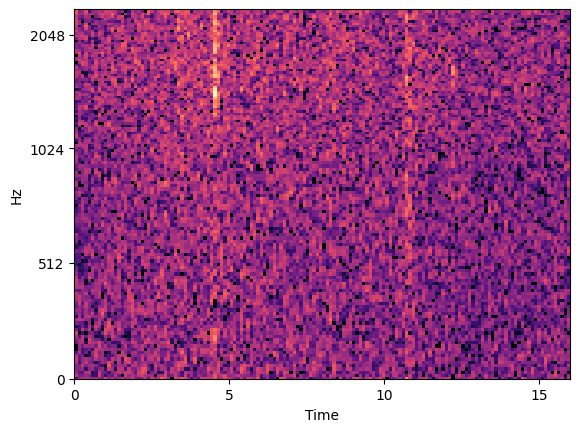

In [26]:
# TO DO
i=random.randint(0,len(augmented_X[augmented_Y=='0']))
#random select using mask indexing
librosa.display.specshow(augmented_X[augmented_Y=='0'][i],sr=4800, x_axis='time',y_axis='mel')
# corresponding target
print(augmented_Y[augmented_Y=='0'][i])

### Task 17
Apply one-hot encoding to the targets of your augmented target variable.

Hint: you can use `to_categorical()`.

In [27]:

#define classes
classes=['1','0']
#encode the string array into integer labels
int_labels=[classes.index(cat) for cat in augmented_Y]
#convert integer labels to one-hot encoded vector
augmented_Y =to_categorical(int_labels,num_classes=2)

### Task 18
Determine the new shape of your features and targets after one-hot encoding. In my case it was:
```
(6700, 129, 150)
(6700, 2)
```

In [28]:
# TO DO
print(augmented_X.shape)
print(augmented_Y.shape)

(6700, 129, 150)
(6700, 2)


### Task 19
Reshape your features so that there is a depth of 1 in the last channel. Hint, you can use `np.reshape()`.

In [29]:
# TO DO
augmented_X =augmented_X[..., np.newaxis]


### Task 20
Determine the new shape of your features and targets after reshaping to add a depth of 1. In my case, it was:
```
(6700, 129, 150, 1)
(6700, 2)
```

In [30]:
# TO DO
print(augmented_X.shape)
print(augmented_Y.shape)

(6700, 129, 150, 1)
(6700, 2)


### Task 21

* Create a 2D convolutional neural network.

* **Do NOT** use an architecture that I previously did, in any of my previous notebook that I gave you in class, or that is on the course website.

* In other words, you need to create your own architecture with your own hyper-parameters.

In [31]:
# TO DO
INPUT_SHAPE = (augmented_X.shape[1],augmented_X.shape[2], 1)

# create model
model = keras.Sequential()

# 1st conv layer
model.add(keras.layers.Conv2D(filters = 16, kernel_size = 4, input_shape = INPUT_SHAPE, activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size =(3,3)))

# 2nd conv layer
model.add(keras.layers.Conv2D(filters = 32, kernel_size = 4, activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size=(3,3)))

# 3rd conv layer
model.add(keras.layers.Conv2D(filters = 32, kernel_size = 4, activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

# 4th Conv layer
model.add(keras.layers.Conv2D(filters = 64, kernel_size = 4, activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

# flatten the ouput and feed it into dense layer
model.add(Flatten())

# create 15 fully connected units
model.add(Dense(units = 15, activation='relu'))

# The output layers
model.add(Dense(2, activation = 'softmax'))

# Here we tell the model how to improve/update the weights
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])
# TO DO ...

### Task 22
Determine the model architecture using the `.summary()` function.

In [32]:
# TO DO
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 147, 16)      272       
                                                                 
 max_pooling2d (MaxPooling2  (None, 42, 49, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 39, 46, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 12, 32)        16416     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 6, 32)          0

### Task 23
Train the neural network for a number of epochs on your dataset.

* If your model doesn't converge towards a good accuracy, perhaps you should change the model and train again? This is up to you.

In [33]:

history=model.fit(augmented_X,augmented_Y,batch_size=32,epochs=5,validation_split=0.2)


Epoch 1/5
168/168 [==============================] - 66s 378ms/step - loss: 0.7251 - accuracy: 0.6397 - val_loss: 0.5207 - val_accuracy: 0.8030
Epoch 2/5
168/168 [==============================] - 71s 424ms/step - loss: 0.4014 - accuracy: 0.8575 - val_loss: 0.2588 - val_accuracy: 0.8933
Epoch 3/5
168/168 [==============================] - 70s 415ms/step - loss: 0.2108 - accuracy: 0.9377 - val_loss: 0.1381 - val_accuracy: 0.9634
Epoch 4/5
168/168 [==============================] - 60s 359ms/step - loss: 0.1108 - accuracy: 0.9722 - val_loss: 0.0877 - val_accuracy: 0.9664
Epoch 5/5
168/168 [==============================] - 62s 367ms/step - loss: 0.0781 - accuracy: 0.9769 - val_loss: 0.0512 - val_accuracy: 0.9925


The code below frees some RAM. You do not need to do anything.

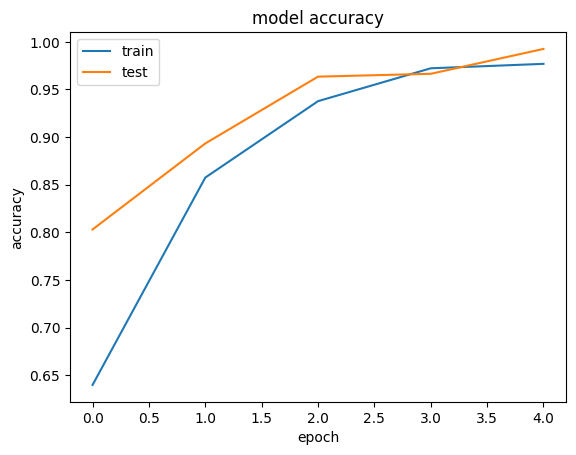

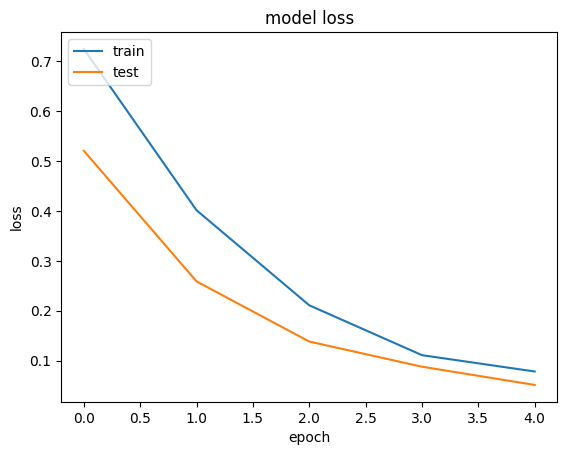

In [34]:
#history visualization
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [35]:
del augmented_X, augmented_Y, X, Y

Download 5 test files. You do not need to do anything.

In [36]:
downloaded = drive.CreateFile({'id':"1JHJkpEdgbLR3pQ_4csqa8Ohf4c8tEc46"})
downloaded.GetContentFile('test1.wav')

downloaded = drive.CreateFile({'id':"1EAw4GeWSEPy0hSZirOPJCsGjdQTCMzhm"})
downloaded.GetContentFile('test2.wav')

downloaded = drive.CreateFile({'id':"1u3WI2czX0XkkOP7KmjWlSaj5bgkH0h5h"})
downloaded.GetContentFile('test3.wav')

downloaded = drive.CreateFile({'id':"16lAiuPVIYR10nbNnn_QZIxVgkpXRJUVi"})
downloaded.GetContentFile('test4.wav')

downloaded = drive.CreateFile({'id':"1DJ1rDs06cQ6QXFrHmJfSqCBCe98Oitjf"})
downloaded.GetContentFile('test5.wav')

Load the five testing files.

* The sampling rate is identical to the training files.

* I have ensured that each file will be exactly 3 seconds, to match the shape of your training data.

* You do not need to do anything.

In [37]:
test1, test1_sr = librosa.load('test1.wav', sr=48000)
test1 = test1[:3*test1_sr]

test2, test2_sr = librosa.load('test2.wav', sr=48000)
test2 = test2[:3*test2_sr]

test3, test3_sr = librosa.load('test3.wav', sr=48000)
test3 = test3[:3*test3_sr]

test4, test4_sr = librosa.load('test4.wav', sr=48000)
test4 = test4[:3*test4_sr]

test5, test5_sr = librosa.load('test5.wav', sr=48000)
test5 = test5[:3*test5_sr]

### Task 24
* Predict on testing file 1, which is stored in variable `test1`

* Where it states `TO DO`, you will need to write some code that uses scikit-maad to create a mel-spectrogram using the same hyper-parameters you used to build your training set.

* If you did it correctly, you should be able to see a good spectrogram, I have provided that code.

* The remaining code in this block will use your model, and predict on this audio file. It will then output `presence` or `absence`. Did your model output correctly? You do not need to do anything for this point.

1/1 [==============================] - 0s 38ms/step
softmax [[0.99732804 0.00267198]]
presence


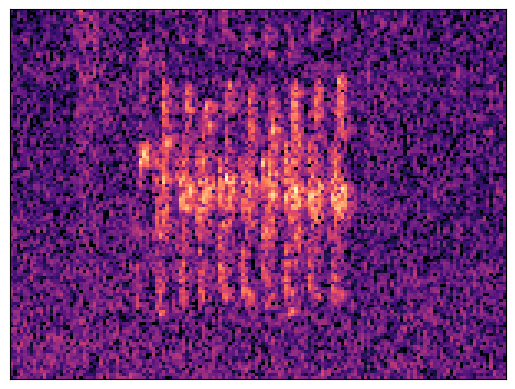

In [42]:
# Do not edit the window and hop size below
# -------------
nperseg = 1024
noverlap = 75
# -------------

# TO DO creat a mel spectrogram for this file, using the same
# hyper-parameters when you created the training set
S, _, _, _ = sound.spectrogram( test1,sr, window, nperseg,noverlap, flims)

S = util.power2dB(S, db_range)

librosa.display.specshow(S)

softmax = model.predict(np.reshape(S, (1, S.shape[0], S.shape[1], 1)))
np.argmax(softmax,-1)

print('softmax', softmax)
print('absence' if np.argmax(softmax,-1)[0]== 1 else 'presence')

### Task 25
* Predict on testing file 2, which is stored in variable `test2`

* Same steps as task 24.

1/1 [==============================] - 0s 89ms/step
softmax [[9.9996793e-01 3.2080963e-05]]
presence


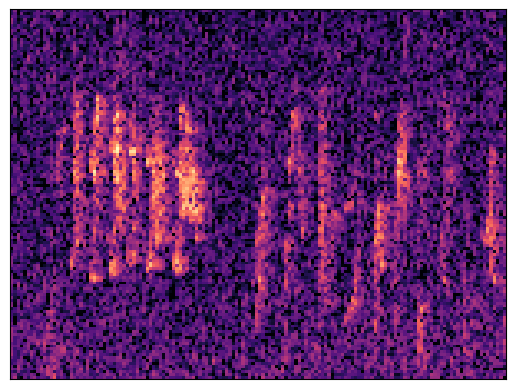

In [41]:
# Do not edit the window and hop size below
# -------------
nperseg = 1024
noverlap = 75
# -------------

# TO DO creat a mel spectrogram for this file, using the same
# hyper-parameters when you created the training set
S, _, _, _ = sound.spectrogram(test2,sr, window, nperseg,noverlap, flims)

S = util.power2dB(S, db_range)
librosa.display.specshow(S)

softmax = model.predict(np.reshape(S, (1, S.shape[0], S.shape[1], 1)))
np.argmax(softmax,-1)

print('softmax', softmax)
print('absence' if np.argmax(softmax,-1)[0]== 1 else 'presence')

### Task 26
* Predict on testing file 3, which is stored in variable `test3`

* Same steps as task 24.

1/1 [==============================] - 0s 34ms/step
softmax [[0.9978313 0.0021687]]
presence


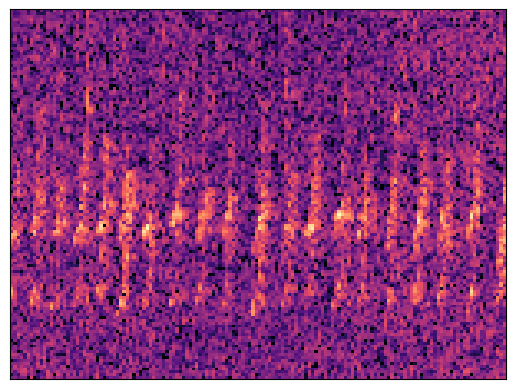

In [44]:
# Do not edit the window and hop size below
# -------------
nperseg = 1024
noverlap = 75
# -------------

# TO DO creat a mel spectrogram for this file, using the same
# hyper-parameters when you created the training set
S, _, _, _ = sound.spectrogram(test3,sr, window, nperseg,noverlap, flims)

S = util.power2dB(S, db_range)
librosa.display.specshow(S)

softmax = model.predict(np.reshape(S, (1, S.shape[0], S.shape[1], 1)))
np.argmax(softmax,-1)

print('softmax', softmax)
print('absence' if np.argmax(softmax,-1)[0]== 1 else 'presence')

### Task 27
* Predict on testing file 4, which is stored in variable `test4`

* Same steps as task 24.

1/1 [==============================] - 0s 25ms/step
softmax [[0.1553173 0.8446827]]
absence


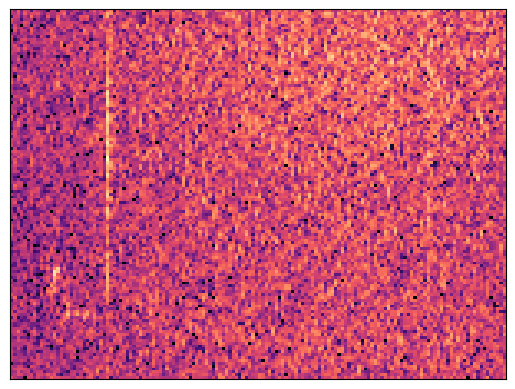

In [45]:
# Do not edit the window and hop size below
# -------------
nperseg = 1024
noverlap = 75
# -------------

# TO DO creat a mel spectrogram for this file, using the same
# hyper-parameters when you created the training set
S, _, _, _ = sound.spectrogram(test4,sr, window, nperseg,noverlap, flims)

S = util.power2dB(S, db_range)
librosa.display.specshow(S)

softmax = model.predict(np.reshape(S, (1, S.shape[0], S.shape[1], 1)))
np.argmax(softmax,-1)

print('softmax', softmax)
print('absence' if np.argmax(softmax,-1)[0]== 1 else 'presence')

### Task 28
* Predict on testing file 5, which is stored in variable `test5`

* Same steps as task 24.

1/1 [==============================] - 0s 26ms/step
softmax [[0.04445403 0.95554596]]
absence


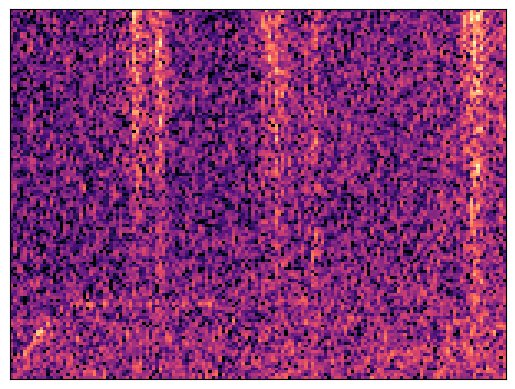

In [46]:
# Do not edit the window and hop size below
# -------------
nperseg = 1024
noverlap = 75
# -------------

# TO DO creat a mel spectrogram for this file, using the same
# hyper-parameters when you created the training set
S, _, _, _ = sound.spectrogram(test5,sr, window, nperseg,noverlap, flims)

S = util.power2dB(S, db_range)
librosa.display.specshow(S)

softmax = model.predict(np.reshape(S, (1, S.shape[0], S.shape[1], 1)))
np.argmax(softmax,-1)

print('softmax', softmax)
print('absence' if np.argmax(softmax,-1)[0]== 1 else 'presence')